### import necessary libraries

In [1]:
import pandas as pd
import os

### Merging 12 months of sales data into 1 csv file

### Read all the files from the directory

In [2]:
files = os.listdir('./SalesData')

all_data_combined_df = pd.DataFrame()

for file in files:
    tempDf = pd.read_csv('./SalesData/'+file)
    all_data_combined_df = pd.concat([all_data_combined_df , tempDf])
    
all_data_combined_df.to_csv('all_data_combo')


workingdf = pd.read_csv('all_data_combo')
    
workingdf.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


###  Augmnt the  data frame with  month column

In [3]:
type(workingdf['Order Date'])

pandas.core.series.Series

In [4]:
workingdf['Month'] = workingdf['Order Date'].str[0:2]
workingdf.head()

## cleaning the nan values from the data frame
# df[df['column name'].isna()]
workingdf[workingdf['Order Date'].isna()]

## Dropping the rows with null values
workingdf=workingdf.dropna(how='any')

workingdf.head()

## find the row with or as Month column and dropping it
workingdf[workingdf['Month'] == 'Or']
workingdf = workingdf[workingdf['Month'] != 'Or']

workingdf.head()


## converting the Month column to numeric

# workingdf['Month'] = pd.to_numeric(workingdf['Month'])

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


##  Making  another column for sales = Price Each * Quantity Ordered

In [5]:
## Making the column Quantity ordered and Price aech as numeric

workingdf['Quantity Ordered'] = pd.to_numeric(workingdf['Quantity Ordered'])
workingdf['Price Each'] = pd.to_numeric(workingdf['Price Each'])

workingdf['Sales']=workingdf['Quantity Ordered']*workingdf['Price Each']



## What was the best month for sales ? 

In [6]:
result = workingdf.groupby('Month').sum()

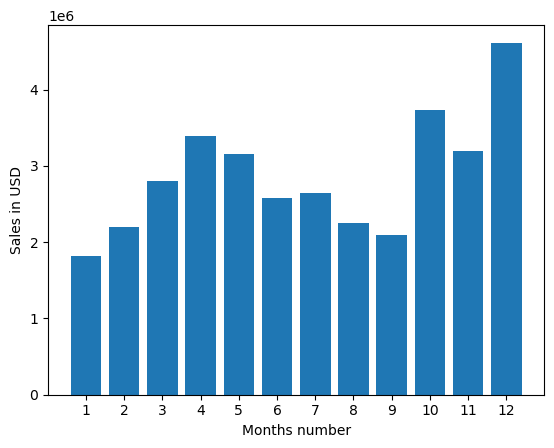

In [7]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months , result['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Months number')

plt.show()

## What city has the highest number of sales

In [8]:
## Augment the data with a city column

workingdf.head()

def getAddress(x):
    list = x.split(",")
    address = list[2][0:3]
    
    return f"{list[1]} ({address})"
    

workingdf['City'] = workingdf['Purchase Address'].apply(lambda x: getAddress(x))

workingdf.head()


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas ( TX)
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston ( MA)
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles ( CA)
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA)
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA)


In [9]:
result = workingdf.groupby('City').sum()

In [10]:
result

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,,
Atlanta ( GA),122928154,1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",0404040404040404040404040404040404040404040404...,2795498.58
Austin ( TX),82709457,1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",0404040404040404040404040404040404040404040404...,1819581.75
Boston ( MA),165758780,1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",0404040404040404040404040404040404040404040404...,3661642.01
Dallas ( TX),124308328,1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",0404040404040404040404040404040404040404040404...,2767975.40
Los Angeles ( CA),247743297,1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",0404040404040404040404040404040404040404040404...,5452570.80
New York City ( NY),208439450,1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil...",0404040404040404040404040404040404040404040404...,4664317.43
Portland ( ME),20641344,1767731768791769091770721772301772331772991773...,AAA Batteries (4-pack)Flatscreen TVWired Headp...,2750,447189.25,04/25/19 20:0704/13/19 14:1504/22/19 09:5304/0...,"30 9th St, Portland, ME 04101370 Sunset St, Po...",0404040404040404040404040404040404040404040404...,449758.27
Portland ( OR),83402354,1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,11303,1860558.22,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",0404040404040404040404040404040404040404040404...,1870732.34
San Francisco ( CA),372569180,1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",0404040404040404040404040404040404040404040404...,8262203.91


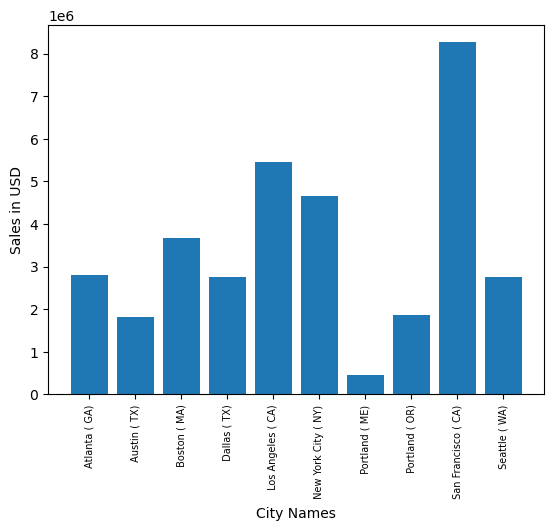

In [11]:
import matplotlib.pyplot as plt

cities = [city for city, df in workingdf.groupby('City')]

plt.bar(cities , result['Sales'])
plt.xticks(cities , rotation='vertical' , size=7)
plt.ylabel('Sales in USD')
plt.xlabel('City Names')

plt.show()

In [12]:
list=[1,2,3,4,5,6,7,8,9,10]

even=[n for n in list if n%2 == 0]

even



[2, 4, 6, 8, 10]

In [13]:
t = ((1,2),(3,4))
print([y for x , y in t])

[2, 4]


In [14]:
workingdf.head(50)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas ( TX)
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston ( MA)
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles ( CA)
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA)
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA)
6,6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",04,11.95,San Francisco ( CA)
7,7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",04,99.99,Seattle ( WA)
8,8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",04,11.95,Atlanta ( GA)
9,9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",04,1700.00,San Francisco ( CA)
10,10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",04,11.99,Boston ( MA)


In [15]:
workingdf['Order Date'] = pd.to_datetime(workingdf['Order Date'])
workingdf.head()

workingdf['Hour'] = workingdf['Order Date'].dt.hour
workingdf['Min'] = workingdf['Order Date'].dt.minute

C:\Users\user\AppData\Local\Temp\ipykernel_15328\535516165.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  workingdf['Order Date'] = pd.to_datetime(workingdf['Order Date'])


In [16]:
workingdf.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Min
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas ( TX),8,46
2,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston ( MA),22,30
3,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles ( CA),14,38
4,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA),14,38
5,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA),9,27


## What time should we display advertisements to maximize the likelihood of the customer's buying the product ?


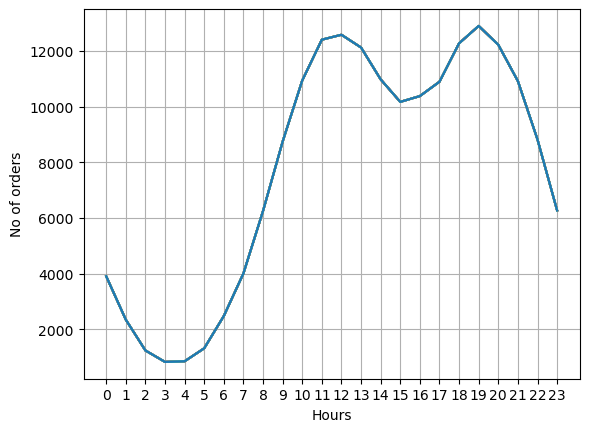

In [17]:
hours = [hour for hour , df in workingdf.groupby('Hour')]

plt.plot(hours , workingdf.groupby('Hour').count())
plt.xticks(hours)
plt.ylabel('No of orders')
plt.xlabel('Hours')
plt.grid()
plt.show()

## What products are most often sold together?

In [18]:
workingdf.head(30)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Min
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas ( TX),8,46
2,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston ( MA),22,30
3,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles ( CA),14,38
4,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA),14,38
5,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA),9,27
6,6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",04,11.95,San Francisco ( CA),13,3
7,7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",04,99.99,Seattle ( WA),7,46
8,8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",04,11.95,Atlanta ( GA),10,58
9,9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",04,1700.00,San Francisco ( CA),10,38
10,10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",04,11.99,Boston ( MA),14,5


In [19]:
## find the items wiuth duplicate product id
df=workingdf[workingdf['Order ID'].duplicated(keep=False)]

In [20]:
df.head(50)

df['Grouped Item'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df.head()

df = df[['Order ID' , 'Grouped Item']].drop_duplicates()

df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_15328\1123183143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped Item'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped Item
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [21]:
df.head()

,Order ID,Grouped Item
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [22]:
from itertools import combinations
from collections import Counter


count = Counter();

for row in df['Grouped Item']:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list , 4)))
    
    
for key , value in count.most_common(100):
    print(key , value)

    

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones', 'AA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', '34in Ultrawide Monitor') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones', 'Apple Airpods Headphones') 1
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Google Phone') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones', 'Google Phone') 1
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones', 'Google Phone') 1
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones', 'Google Phone') 1
('Google Phone', 'USB-C C

## What product sold the most ? Why do you think it sold the most??

In [23]:
workingdf.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Min
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas ( TX),8,46
2,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston ( MA),22,30
3,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles ( CA),14,38
4,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA),14,38
5,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA),9,27


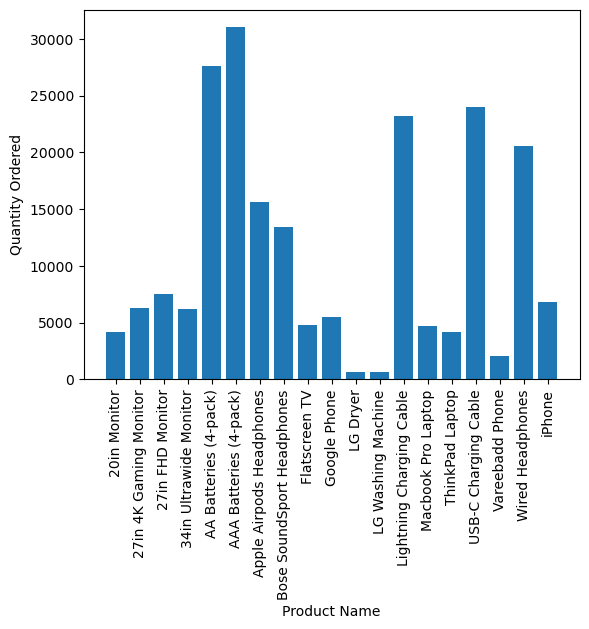

In [24]:
product_group = workingdf.groupby('Product')

quantity_ordered = product_group['Quantity Ordered'].sum()


products = [product for product , df  in workingdf.groupby('Product')]

plt.bar(products , quantity_ordered)
plt.xticks(products  , rotation='vertical')
plt.xlabel('Product Name')
plt.ylabel('Quantity Ordered')

plt.show()




In [27]:
workingdf.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Min
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas ( TX),8,46
2,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston ( MA),22,30
3,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles ( CA),14,38
4,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA),14,38
5,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles ( CA),9,27


C:\Users\user\AppData\Local\Temp\ipykernel_15328\1061409620.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products , rotation='vertical' , size=8)


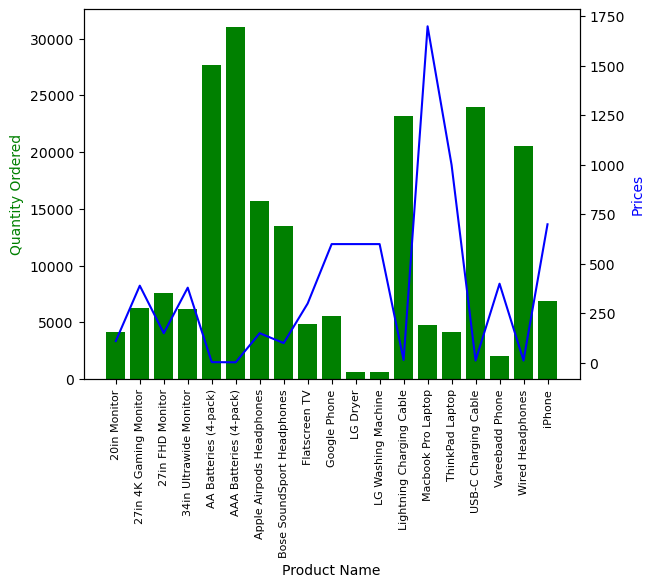

In [28]:
product_group= workingdf.groupby('Product')
prices = product_group['Price Each'].mean()

fig , ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products , quantity_ordered , color='g')
ax2.plot(products , prices , 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered' , color='g')
ax2.set_ylabel('Prices' , color='b')
ax1.set_xticklabels(products , rotation='vertical' , size=8)

plt.show()
